# Introduction

The sinking of the titanic occurred on the night of 14<sup>th</sup> April, 1912. It was the largest passenger liner in service at the time and had an estimated 2224 people on board when she had struck an iceberg around 2340 hours. Within hours, the ship was underwater. The accident resulted in the deaths of more than 1,500 people. The disaster caused widespread outrage over the lack of lifeboats, lax regulations, and the unequal treatment of the three passenger classes during the evacuation. 

##  Objectives

To analyze the survivability rate based on the data provided and extrapolate other unexpected reasons for survival.


##  Data Wrangling

### Data description
 [Source](https://www.kaggle.com/c/titanic)

      
*  survival: Survival (0 = No; 1 = Yes)
*  pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd).
*  name: Name.
*  sex: Gender.
*  age: Age.
*  sibsp: Number of Siblings/Spouses Aboard.
*  parch: Number of Parents/Children Aboard.
*  ticket: Ticket Number.
*  fare: Passenger Fare.
*  cabin: Cabin.
*  embarked: Port of Departure (C = Cherbourg; Q = Queenstown; S = Southampton).

    

#### Notes:
    
        
* Pclass was used to denote socio-economic status (SES) 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower.
* Age is in Years; Fractional if Age less than One (1) If the Age is Estimated, it is in the form xx.5.
    
With respect to the family relation variables (i.e. sibsp and parch) some relations were ignored. The following are the definitions used for sibsp and parch.
        
* Sibling: Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic .
* Spouse: Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored) .
* Parent: Mother or Father of Passenger Aboard Titanic .
* Child: Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic .
            
Other family relatives excluded from this study include cousins, nephews/nieces, aunts/uncles, and in-laws. Some children travelled only with a nanny, therefore parch=0 for them. As well, some travelled with very close friends or neighbors in a village, however, the definitions do not support such relations.
    

##  Initial questions

    
* What factors are positively related to survival?.
* Are there other factors that could affect survival?.



In [1]:
# Importing numpy, pandas for sorting data into matrices and matplot and seaborn libraries for visualization; 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# present charts inline 
%pylab inline

# setting style and background for all graphs
sns.set(color_codes=True)
sns.set_style("whitegrid")

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Helper functions:
 
def plot_correlation_map( df ):
    """takes in target dataframe and plots correlation as heatmap"""
    corr = df.corr() # describes data in dataframe and stored in variable 
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True ) # color of tiles
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 } 
    )

def graph_count_plotter (df, var1, var2, var3, **kwargs):
    """plots histograms displaying the count of variable 1, with respect to the other variables and dataframe of interest.
    All variables need to be strings."""
    return sns.factorplot( \
    var1, col=var2, hue=var3, data=df, kind='count', size=7, aspect=.8)

# plots kdeplot based on dataframe and variables. Different way of displaying data.
def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True ) # displays continuous plot 
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

In [3]:
# loading titanic data as pandas dataframe
titanic_df = pd.read_csv('input/titanic_data.csv')

# data preview of full dataset
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Some values for __Age__ are NaN, while ticket and __Cabin__ values are alphanumeric and were also missing some values. 


## Data Cleaning

In [4]:
# determine number of missing values in cleaned data set
total_null = titanic_df.isnull().sum()

print "Total number of null values:"

print total_null
print "------------"
# determining number of missing age entries for males and females

age_nans = pd.isnull(titanic_df['Age'])
cabin_nulls = pd.isnull(titanic_df['Cabin'])

print titanic_df[age_nans].head()

missing_age_female = titanic_df[age_nans]['Sex'] == 'female'
missing_age_male = titanic_df[age_nans]['Sex'] == 'male'
missing_cabin_female = titanic_df[cabin_nulls]['Sex'] == 'female'
missing_cabin_male = titanic_df[cabin_nulls]['Sex'] == 'male'
print "--------------"
print 'Number of passengers missing age values: females: {} and males: {} \n\
Number of missing cabin numbers for female passengers: {} and male passengers: {}' .format(
    missing_age_female.sum(),missing_age_male.sum(),missing_cabin_male.sum(),missing_cabin_female.sum())


Total number of null values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
------------
    PassengerId  Survived  Pclass                           Name     Sex  Age  \
5             6         0       3               Moran, Mr. James    male  NaN   
17           18         1       2   Williams, Mr. Charles Eugene    male  NaN   
19           20         1       3        Masselmani, Mrs. Fatima  female  NaN   
26           27         0       3        Emir, Mr. Farred Chehab    male  NaN   
28           29         1       3  O'Dwyer, Miss. Ellen "Nellie"  female  NaN   

    SibSp  Parch  Ticket     Fare Cabin Embarked  
5       0      0  330877   8.4583   NaN        Q  
17      0      0  244373  13.0000   NaN        S  
19      0      0    2649   7.2250   NaN        C  
26      0      0    2631  

It is to be noted that 177 null age items and 687 null cabin items were detected in the given dataset, which accounts for ~20% and ~77% of the total number of passengers respectively. The null embarked items are negligible as they account for 0.002% of the whole dataset and will not have significant consequences in our analysis. The null age values will not affect the graphing and summation operations on the data as it is treated as a zero(0) value, but it needs to be considered while reviewing descriptive stats like average (mean) age. The null cabin values will not be changed either as there is no real way to accurately substitute the missing values without it skewing the analysis. 
 
__Note:__

Number of female passengers whose age is missing - __124__

Number of male passengers whose age is missing - __53__


The null values were replaced with median of the age rather than the mean or zero so that during the calculation of the mean so as to avoid any skewed values. 


In [5]:
# Cleaning data: Removing items that do not contribute to survival analysis

# Dropping information that does not pertain to current questions
# cleaned data will contain int variables and are chosen to make it easier to describe data.

titanic_cleaned = titanic_df.drop(['Cabin','Name','Ticket','PassengerId','Embarked'], axis=1)

# replacing Nans
median_age = titanic_cleaned['Age'].median()

# print median_age

titanic_without_nan = titanic_cleaned.fillna(median_age)

age_nans = pd.isnull(titanic_without_nan['Age'])
titanic_without_nan[age_nans].head() # checking if data-frame has any null values.


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare


Dataframe has been scrubbed for null values for the age column and were replaced with the column's median. The median was chosen for my analysis in an attempt to not skew the mean value of all the values in age column. 

In [6]:
titanic_without_nan.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


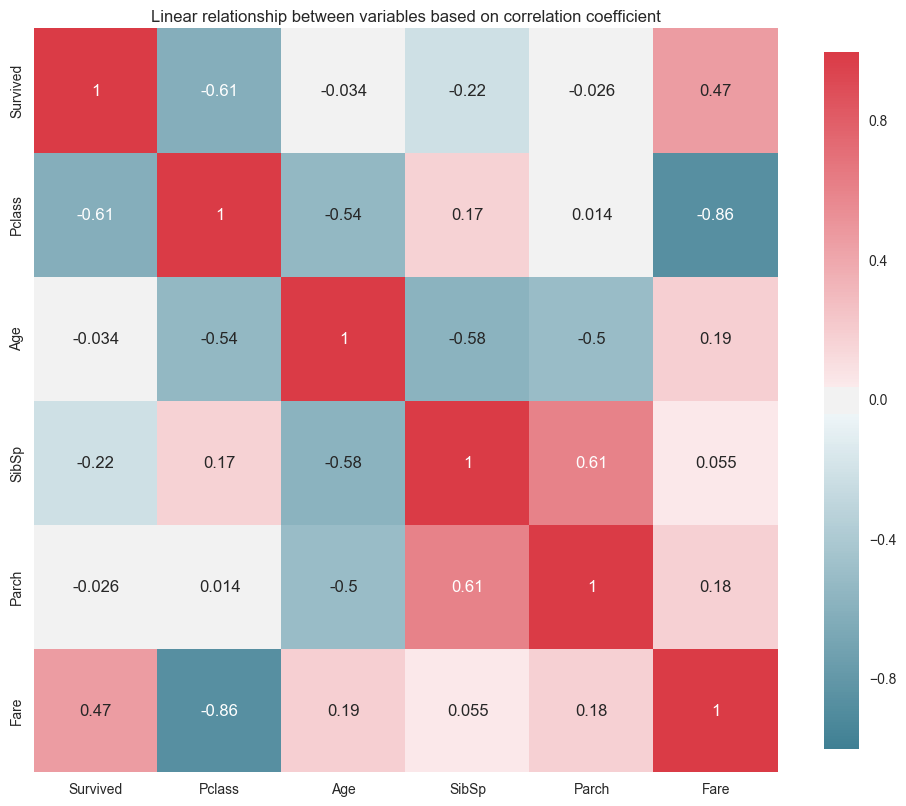

In [7]:
# correlation heatmap
correlated_variables = titanic_without_nan.corr()
plot_correlation_map(correlated_variables)
plt.title("Linear relationship between variables based on correlation coefficient")
# heatmap shows important variables for consideration. 
# based on plot, positive correlation between survival and fare, 
# and negative correlation between survival and class. 

__Analysis__:

Let's investigate the correlation between the several variables presented in the dataset. The heatmap in the cell above shows __positive correlation__ between __survivability__ and __age__, whereas there is a __negative correlation__ between __class__ and __survival__. Based on thse initial observations, the following was investigated :

## Questions

Q1. Are there any biases based on gender and class in the survivability of the passenger ? 


Q2. Was there increased survivability based on age? 


Q3. Does a family or individual have a higher chance to survive this catastrophe? 


Other questions that could be derived from this analysis: 


Q4. Was there any relation between the survivors and location from where the travellers originated (embarked)? 


Q5. Is there any relationship with lifeboat and cabin location? And is there increased chances of survival due to that?

__Note__: An attempt to answer these questions will be made by, isolating variables of the dataset that are required for the analysis after which, a count of all the values will be taken, which will quantify the number of survivors. Subsequently, those values will be used to analyze the dataset, mainly by deriving the percentages, and graphs.

In [8]:

def percent_survivors( df , var1 , var2 ):
    """prints survival percentage values based on gender and class. It takes in dataframe(df) and 2 variables 
    that defines how the df will be grouped and will perform calculations appropriately."""
    n = 0
    sex = ['male','female']
    pclass = [1,2,3]
    df_survived = df[df['Survived']==True]
    for item in pclass:
        for gender in sex:
            grouped_class_gender = df.groupby([var1,var2]).size()[item,gender].astype('float') 
            survived_class_gender = df_survived.groupby([var1,var2]).size()[item,gender].astype('float')
            survivors_by_gender = ((survived_class_gender/grouped_class_gender) * 100).round(2)
            print "Survivors of {}: {} and {}: {} are {}%".format(var1,item,var2,gender,survivors_by_gender)
            

Total number of survivors based on class and sex: 
Pclass  Sex     Survived
1       female  0             3.0
                1            91.0
        male    0            77.0
                1            45.0
2       female  0             6.0
                1            70.0
        male    0            91.0
                1            17.0
3       female  0            72.0
                1            72.0
        male    0           300.0
                1            47.0
dtype: float64


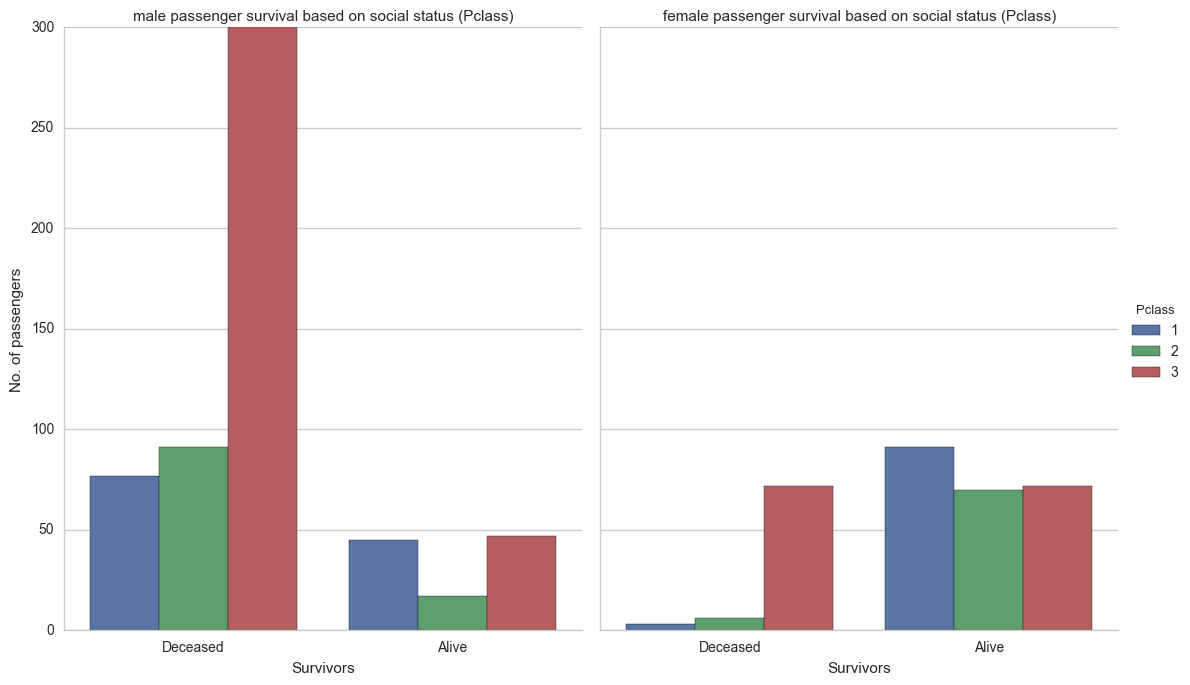

In [9]:
# Grouping objects by Pclass, sex and survivors

survived_class_gender = titanic_without_nan.groupby(['Pclass','Sex','Survived']).size().astype('float')

print "Total number of survivors based on class and sex: \n{}".format(survived_class_gender)

# Investiage total number of survivors based on class

g = graph_count_plotter(titanic_without_nan,'Survived','Sex','Pclass')

(g.set_axis_labels('Survivors','No. of passengers')
    .set_xticklabels(['Deceased','Alive'])
    .set_titles('{col_name} passenger survival based on social status (Pclass)')
)

__Analysis__:

Based on the raw numbers it would appear as though passengers in Class 3 category had a similar survival rate as those from Class 1 category with 119 and 136 passengers surviving respectively. However, if we look closely at the percentages of the overall passengers per class and the total numbers across each class, it can be assumed that a passenger from Class 1 is about __2.5x__ times more likely to survive than a passenger in Class 3.

Survivors of Pclass: 1 and Sex: male are 36.89%
Survivors of Pclass: 1 and Sex: female are 96.81%
Survivors of Pclass: 2 and Sex: male are 15.74%
Survivors of Pclass: 2 and Sex: female are 92.11%
Survivors of Pclass: 3 and Sex: male are 13.54%
Survivors of Pclass: 3 and Sex: female are 50.0%


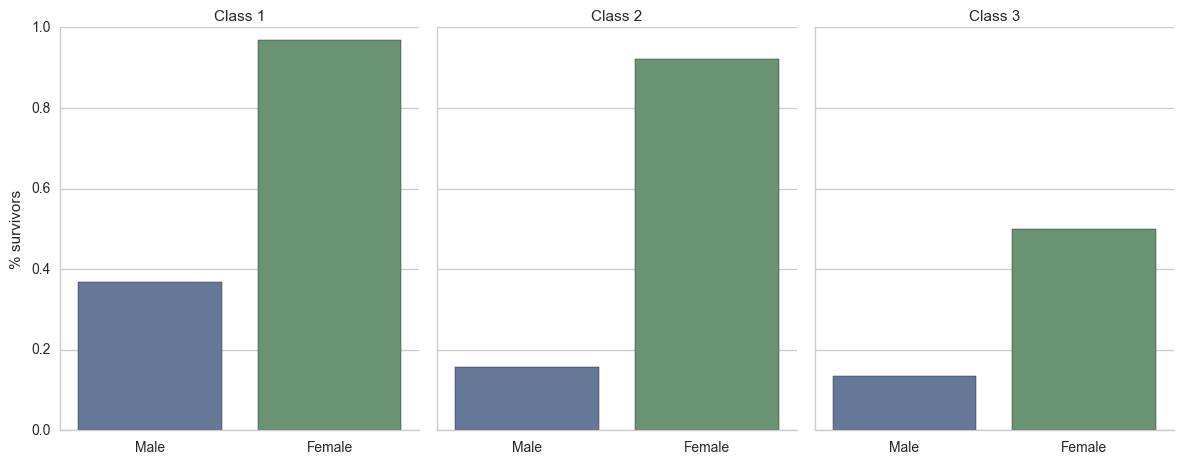

In [10]:
# Percentage - number of survivors by gender and class 
# Comparison of survivors by sex and class

percent_survivors (titanic_without_nan,'Pclass','Sex')

# Histogram to display survivors grouped by sex and class

v = sns.factorplot(x='Sex', y='Survived', col='Pclass', data=titanic_without_nan, 
                   saturation=.5, kind="bar", ci=None, size=5, aspect=.8)
# adding labels
(v.set_axis_labels('', '% survivors')
     .set_xticklabels(['Male', 'Female'])
     .set_titles('Class {col_name}'))


The graphs displayed above indicate that there was definitely higher chance of survival if you were __female__ rather than male and an even higher chance of survival if you were part of the upper echelons of society. 
The graphs shown below confirm this analysis and indicate that there were more female survivors than male survivors overall, regardless of class. 

## Next Question:
__Is there an increased chance of survival based on age?__


It would be interesting to see if there were any: 

    
* Children below the age of 18.
* Senior passengers.
    

who survived or did not survive this incident.
 

In [11]:
# Analysis based on Age:

infants = titanic_df[titanic_df['Age'] < 18]
# print infants.head()

# death count of children age < 18?

non_survivors_infants = infants[infants['Survived'] == False]['Survived'].count()
print "Number of deceased passengers less than 18 years old: {}".format(non_survivors_infants)

# Number of survivors whose age is >40?

old = titanic_without_nan[titanic_without_nan['Age'] > 40]
# print old.count()
non_survivors_seniors = old[old['Survived'] == False]['Survived'].count()
print "Number of deceased passengers over 40: {}".format(non_survivors_seniors)


Number of deceased passengers less than 18 years old: 52
Number of deceased passengers over 40: 95


In [12]:
# Oldest and youngest to survive and those who did not
max_age_survived = titanic_without_nan[titanic_without_nan['Survived'] == True]['Age'].min()
min_age_dead = titanic_without_nan[titanic_without_nan['Survived'] == False]['Age'].min()
max_age_survived = titanic_without_nan[titanic_without_nan['Survived'] == True]['Age'].max()
max_age_dead = titanic_without_nan[titanic_without_nan['Survived'] == False]['Age'].max()

print 'Youngest to survive: {} y.o. \n\
Youngest to die: {} y.o. \n\
Oldest to survive: {} y.o. \n\
Oldest to die: {} y.o.'.format(max_age_survived, min_age_dead, max_age_survived, max_age_dead)

Youngest to survive: 80.0 y.o. 
Youngest to die: 1.0 y.o. 
Oldest to survive: 80.0 y.o. 
Oldest to die: 74.0 y.o.


Total number of survivors: 342 
Total number of non survivors: 549 
Mean age of survivors: 28.0 
Mean age of non survivors: 30.0 
Oldest to survive: 80.0 
Oldest that didn't make it: 74.0


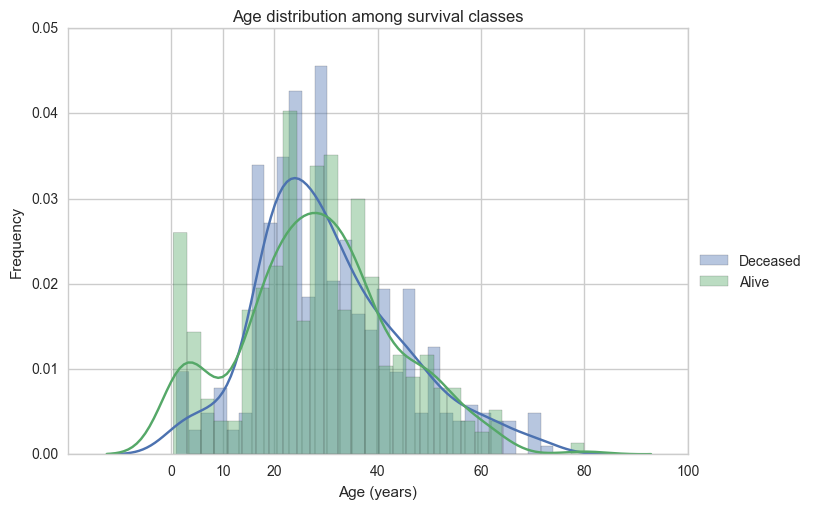

In [13]:
# Find total count of survivors and non-survivors
survived_passengers = titanic_without_nan[titanic_without_nan['Survived'] == True]['Survived'].count()
lost_souls = titanic_without_nan[titanic_without_nan['Survived'] == False]['Survived'].count()

# Find average of survivors and those who didn't
shipwreck_survivors_avg = titanic_without_nan[titanic_without_nan['Survived'] == True]['Age'].mean()
avg_age_death = titanic_without_nan[titanic_without_nan['Survived'] == False]['Age'].mean()

# Display a few raw totals
print "Total number of survivors: {} \n\
Total number of non survivors: {} \n\
Mean age of survivors: {} \n\
Mean age of non survivors: {} \n\
Oldest to survive: {} \n\
Oldest that didn't make it: {}" \
.format(survived_passengers, lost_souls, np.round(shipwreck_survivors_avg), 
        np.round(avg_age_death), max_age_survived, max_age_dead)

# Graph - Age of passengers across sex of those who survived (Source: Udacity reviewer comments)

sns.distplot(titanic_df.loc[(titanic_df['Survived']==0) & (~titanic_df['Age'].isnull()),'Age'], bins=30)
sns.distplot(titanic_df.loc[(titanic_df['Survived']==1) & (~titanic_df['Age'].isnull()),'Age'], bins=30)
plt.title('Age distribution among survival classes')
plt.ylabel('Frequency')
plt.legend(['Deceased', 'Alive'],loc='upper left',bbox_to_anchor=(1,0.5))
plt.xticks([0, 10, 20, 40, 60, 80, 100])
plt.xlabel('Age (years)')

__Analysis:__

The graph shown above shows the probability distribution of survivors based on their age. Based on this plot and the calculations above, it can be inferred that there was some bias in age: there is a 'spike' in frequency of survivors in the age group between 0 - 10, and an almost equal likelihood of survivors and non-survivors in the age group 20 - 40. However, there weren't as many survivors from the more senior age category (60 - 80), suggesting either the crew members did not allow them on to the lifeboats or they chose to sacrifice themselves for the younger generation.

## Next Question

Does a family or individual have a higher chance to survive this catastrophe? 

In [14]:
# editing titanic df to leave out PassId, Ticket, Fare
titanic_no_pass_tic_fare = titanic_df.drop(['PassengerId','Ticket','Fare'],axis=1)
titanic_no_pass_tic_fare.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,NaN,S


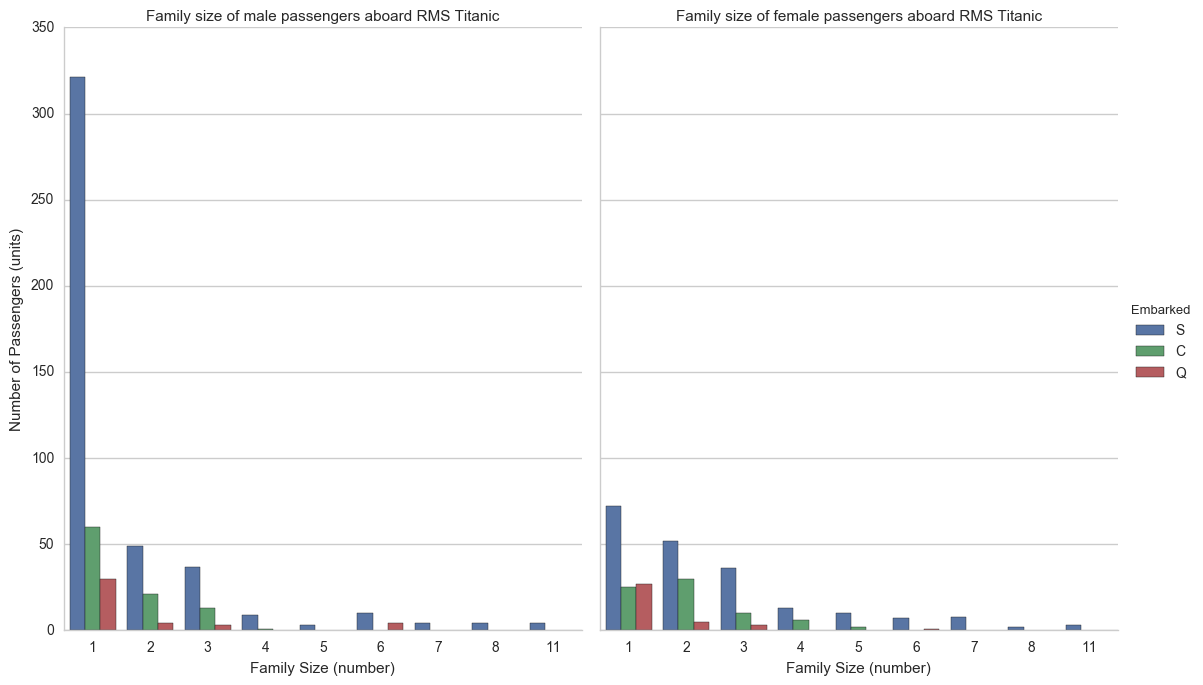

In [15]:
# creating dataframe for family size
family = pd.DataFrame()

# introducing a new feature : the size of families (including the passenger)
family[ 'FamilySize' ] = titanic_no_pass_tic_fare[ 'Parch' ] + titanic_no_pass_tic_fare[ 'SibSp' ] + 1

# introducing other features based on the family size
family[ 'Individual' ] = family[ 'FamilySize' ].map( lambda s : 1 if s == 1 else 0 )
family[ 'Small' ]  = family[ 'FamilySize' ].map( lambda s : 1 if 2 <= s <= 4 else 0 )
family[ 'Large' ]  = family[ 'FamilySize' ].map( lambda s : 1 if 5 <= s else 0 )
family['Name'] = pd.Series(titanic_no_pass_tic_fare['Name']) # copies series over from one df to the other under given col name

# print family.head()

# Merging titanic df to family df:

titanic_fam_size_included = titanic_no_pass_tic_fare.merge(family, how='left',on='Name')

# titanic_fam_size_included.head()

# Displaying family size distribution(kernel density estimation plot) in titanic passenger profile:

g = graph_count_plotter(titanic_fam_size_included,'FamilySize','Sex','Embarked')

(g.set_titles('Family size of {col_name} passengers aboard RMS Titanic')
.set_axis_labels('Family Size (number)','Number of Passengers (units)'))
# plt.legend(loc='upper left',bbox_to_anchor=(1,0.5))

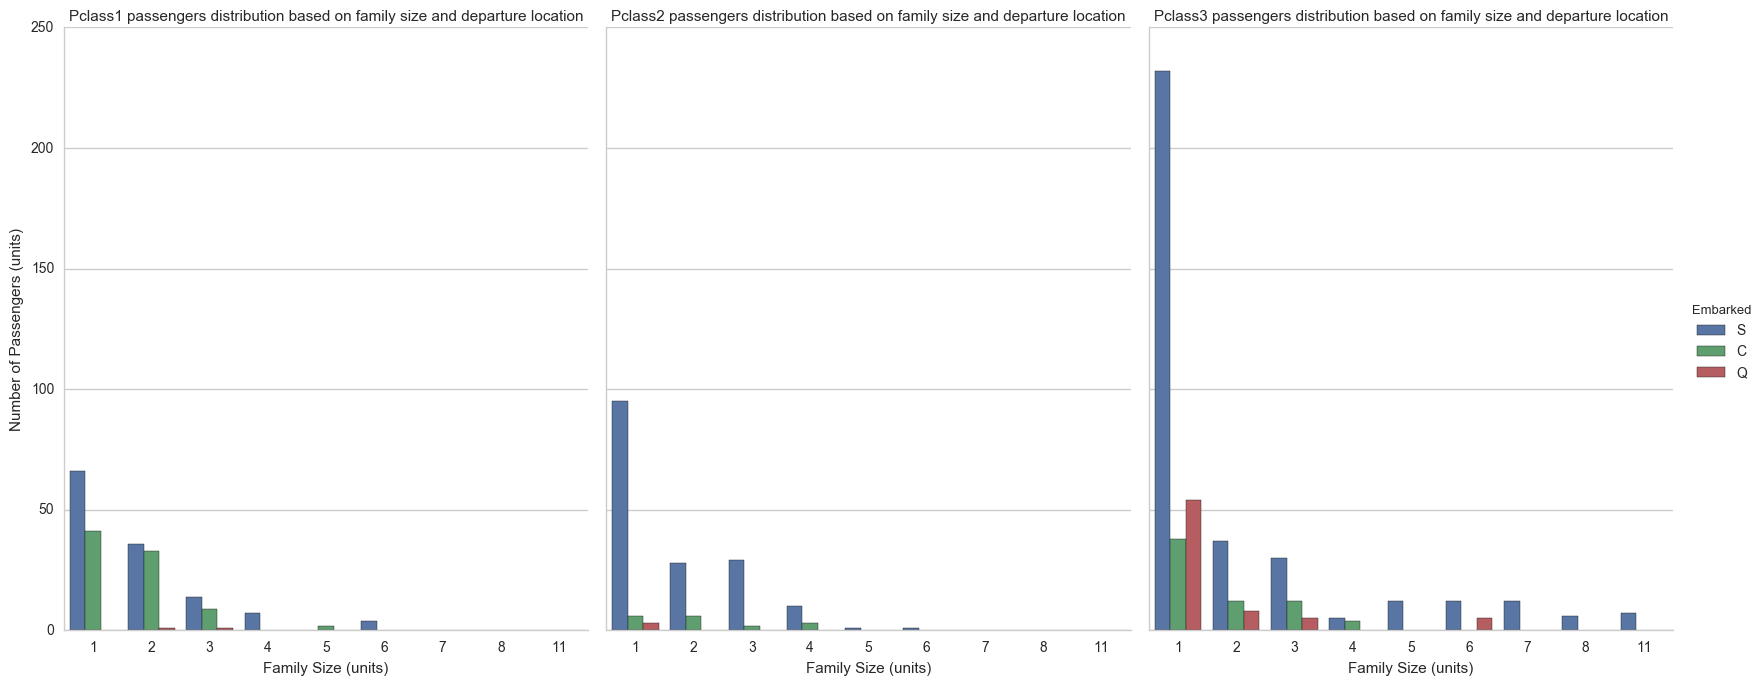

In [16]:
g = graph_count_plotter(titanic_fam_size_included,'FamilySize','Pclass','Embarked')
(g.set_titles('Pclass{col_name} passengers distribution based on family size and departure location')
    .set_axis_labels('Family Size (units)','Number of Passengers (units)')
)

__Analysis__: 

The legend states the port of departure and its color coding on the graph. S - Southampton, UK, C - Cherbourg, FR, Q - Queenstown, UK. Pclass: 1 (Upper class), 2 (Upper middle class), 3 (Working class).
Family size represents the total number of individuals under the same family based on Sibsp(Number of Spouses/Siblings Aboard) and Parch(Number of Parents/Children Aboard).

The graph above shows that most of the passengers that were single males, and a majority, from the Southampton working class. In addition, most of the larger families were from the port of Southampton, which checks out because of the most of the passengers were from Southampton.  

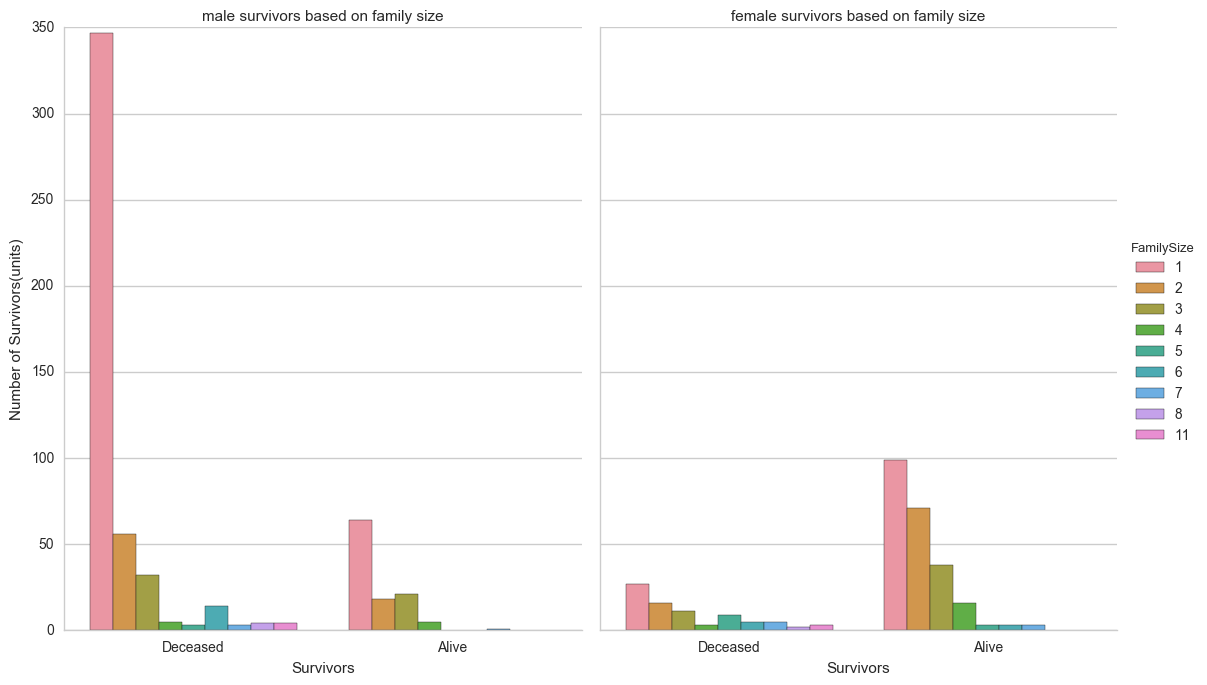

In [17]:
# Total number of survivors based on size of family and gender.

g = graph_count_plotter(titanic_fam_size_included,'Survived','Sex','FamilySize')
(g.set_axis_labels('Survivors','Number of Survivors(units)')
    .set_xticklabels(['Deceased','Alive'])
    .set_titles('{col_name} survivors based on family size')
)


__Analysis:__

The legend on the right states the family size and its respective color code. 1 - means individual/single, 2 suggests a couple (spouse) or siblings, 3 - 11 suggests a family that considers both siblings, spouses and children.
It appears that an individual male was highly unlikely to survive in this situation, with slightly higher percentage of surviving if you were female. Female members of mid-sized families ( 2 - 4 members) were more likely to survive almost __2x__ more favorable compared to their male counterparts.


## Miscellaneous Questions

Is there any correlation between the location of departure (embarked) and the survivors?

In [18]:
# Total number of passengers based on class, gender and location of departure:

embarked_info = titanic_df.drop(['Ticket','PassengerId'], axis=1)
embarked_info.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


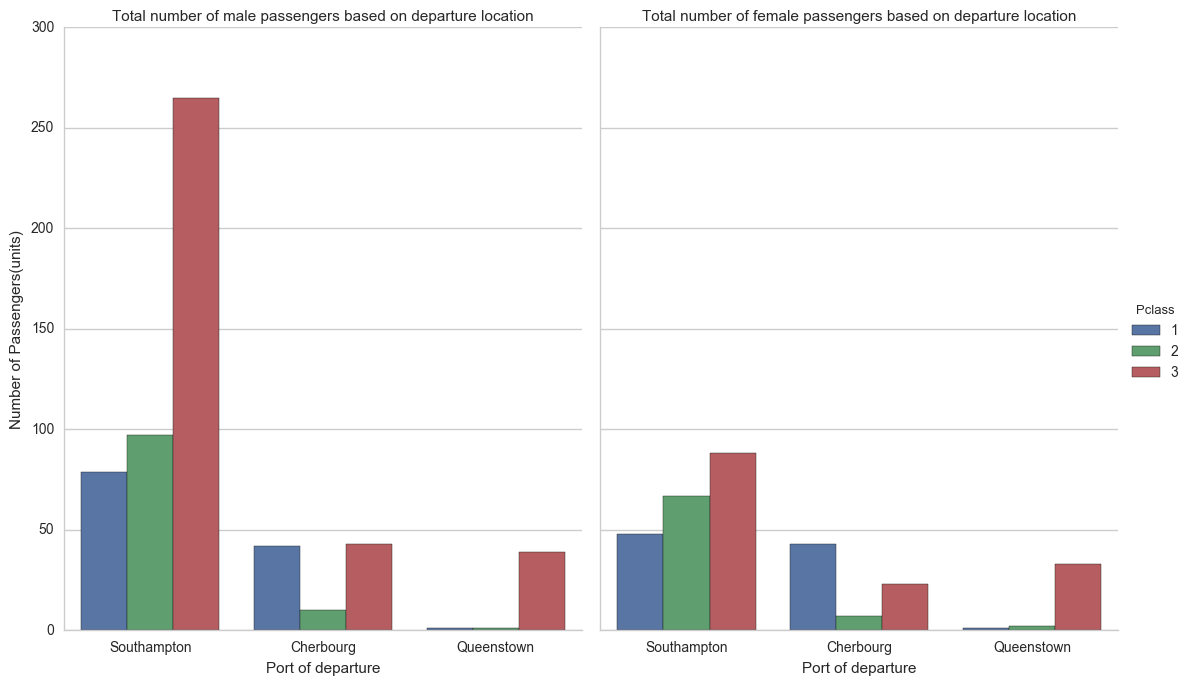

In [19]:
g = graph_count_plotter(embarked_info,'Embarked','Sex','Pclass')
(g.set_titles('Total number of {col_name} passengers based on departure location')
    .set_axis_labels('Port of departure','Number of Passengers(units)')
     .set_xticklabels(['Southampton','Cherbourg','Queenstown'])
)

__Analysis__:

The legend states the social status of the passengers (Pclass) and ranks them from 1 - 3; 1 - Upper class, 2 - upper middle class, 3 - working class.
From the information displayed above shows the total number of passengers of each class and gender from each port. We can see that most of the passengers were from the Southhampton(S) port of departure. A great majority of them were from the __working class__ (Pclass3). A significant number of Upper and middle class passengers were from this region as well. Now let's see how many lived to tell the tale.


### Survival odds

Based on the information we have gathered thus far, it gives us a chance to determine the likelihood of survival in this particular scenario:

In [20]:
# Based on Class and Gender:

print "Percent number of survivors based solely on class and gender:"
percent_survivors (titanic_without_nan,'Pclass','Sex')

# Based on port of departure:

# Total number of survivors based on location of departure, gender and class:

embarked_survivors = embarked_info[embarked_info['Survived']==True]
embarked_dead = embarked_info[embarked_info['Survived']==False]

# print embarked_survivors.describe()
print "--------------"
print "Total survivors based on embarked location:"
survived = embarked_survivors.groupby(['Embarked','Sex','Pclass'])['Survived'].count()
print survived
print "--------------"
print "Total that did not make it based on embarked location:"
print embarked_dead.groupby(['Embarked','Sex','Pclass'])['Survived'].count()
print "--------------"
total = embarked_info.groupby(['Embarked','Sex','Pclass'])['Survived'].count()
pct_survived = ((survived/total)* 100).round(2)
print "Percent survivors:"
print pct_survived


Percent number of survivors based solely on class and gender:
Survivors of Pclass: 1 and Sex: male are 36.89%
Survivors of Pclass: 1 and Sex: female are 96.81%
Survivors of Pclass: 2 and Sex: male are 15.74%
Survivors of Pclass: 2 and Sex: female are 92.11%
Survivors of Pclass: 3 and Sex: male are 13.54%
Survivors of Pclass: 3 and Sex: female are 50.0%
--------------
Total survivors based on embarked location:
Embarked  Sex     Pclass
C         female  1         42
                  2          7
                  3         15
          male    1         17
                  2          2
                  3         10
Q         female  1          1
                  2          2
                  3         24
          male    3          3
S         female  1         46
                  2         61
                  3         33
          male    1         28
                  2         15
                  3         34
Name: Survived, dtype: int64
--------------
Total that did not ma

In [21]:
embarked_nans = pd.isnull(embarked_info['Embarked'])
embarked_info[embarked_nans].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,80.0,B28,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,80.0,B28,NaN


Just a side note - It seems like the null (NaN) value is resulting from 0/0 operation, since the NaN embarked values are for females, not males. Its highly likely that Ms. Icard departed from Cherbourg, however, we can't say the same for Mrs. Nelson and at the same time, it's insignificant in our analysis. 

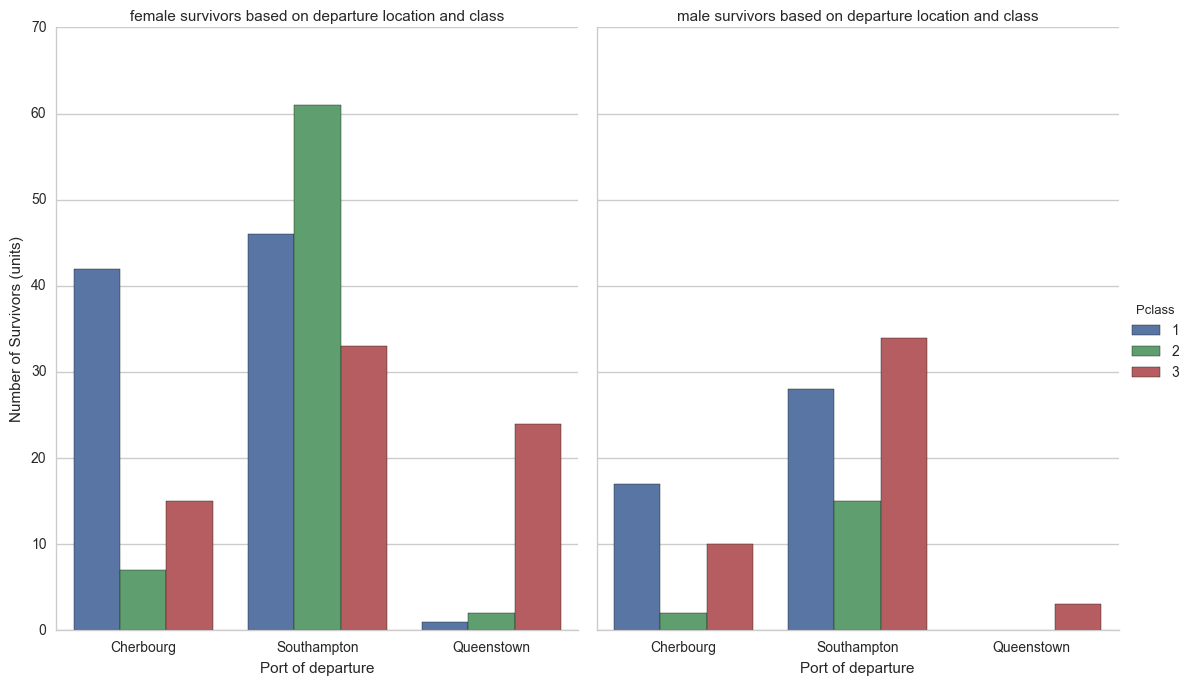

In [22]:
g = graph_count_plotter(embarked_survivors, 'Embarked', 'Sex', 'Pclass')
(g.set_axis_labels('Port of departure', 'Number of Survivors (units)')
     .set_titles('{col_name} survivors based on departure location and class')
    .set_xticklabels(['Cherbourg','Southampton','Queenstown'])

)

__Analysis__:

The details in the graph above describes the number of survivors with respect to their class and port of departure. It reconfirms our data that the survivors were mostly female and from the upper class(Pclass1) to middle class(Pclass2) coming from Cherbourg (C)and Southampton (S) and the worker class(3) survivors were primarily from Southampton (S) and Queenstown (Q). This could be attributed to the fact that majority of the passengers were from S. 


It appears that there may not be much significance in this finding since a majority of the passengers were from Southampton survival based on port of departure could be due to pure luck. However, further investigation could be done to study the relation between the cabin number and position of life boats to determine likelihood of survival.


![alt text](https://s-media-cache-ak0.pinimg.com/originals/d0/70/f2/d070f26ef5bac9b62d93f9fb328bf43e.jpg "Titanic cabin layout")

Without much analysis, if we look at the layout of the cabins in the image above, the lifeboats are present at the very top level of the titanic. The 1st class passengers would be the closest to the location of those boats, and so, when the alarm sounded, they would have a headstart over the other passengers. 

Based on this observation, could there any relation between the cabin and lifeboat location on the ship? And did all the passengers near positioned closer to the boats survive? 



In [23]:
# Creating cabin dataframe 
cabin_df = pd.DataFrame()

modified_titanic_df_cabins = titanic_df.drop(['PassengerId','Ticket','Fare'],axis=1)

# modified_titanic_df_cabins.head()

# Replacing Nans with 'U' (Unknown)

cabin_df['Cabin'] = modified_titanic_df_cabins.Cabin.fillna('U')

# print cabin_df.head()

# Extracting first letter of each cabin value and creating a new column with it

cabin_df['CabinLevel'] = cabin_df['Cabin'].astype(str).str[0]

# Inserting survived column; preparing df for merge

cabin_df['Survived'] = pd.Series(modified_titanic_df_cabins['Survived'])

# print cabin_df[:30]

# merging dataframes:
merged_cabin_df = modified_titanic_df_cabins.merge(cabin_df,left_index = True, right_index=True, how = 'outer', on='Survived')
merged_cabin_df = merged_cabin_df.drop(['Cabin_x'],axis=1)
cabin_survivors = cabin_df.groupby(['CabinLevel','Survived'])['Survived'].count()
# print merged_cabin_df.head()
print"Survivors based on Cabin Level:"
print cabin_survivors
merged_cabin_df[:30]


Survivors based on Cabin Level:
CabinLevel  Survived
A           0             8
            1             7
B           0            12
            1            35
C           0            24
            1            35
D           0             8
            1            25
E           0             8
            1            24
F           0             5
            1             8
G           0             2
            1             2
T           0             1
U           0           481
            1           206
Name: Survived, dtype: int64


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,Cabin_y,CabinLevel
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,S,U,U
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,C,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,U,U
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,S,C123,C
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,S,U,U
5,0,3,"Moran, Mr. James",male,NaN,0,0,Q,U,U
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,S,E46,E
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,S,U,U
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,S,U,U
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,C,U,U


__Analysis__: 

It seems like one passenger can have more than 1 cabin allotted to him/herself. Extracting useful information regarding number of survivors based on cabin level would be tricky since 687 entries are null values and that there could be more than one cabin for one passenger. To the best of my knowledge, it seems like it would be difficult to apply any imputation methods that would help yield more interesting results.  

# Conclusion

In the given scenario, my findings suggest that if the passsenger is female, and of a higher social status, their chance of survival is very high as compared to being a male from the working class as they had a very low chance of survival __~13%__. Similarly, analysis of survivors based on port of departure was that most of the survivors were from __Cherbourg__ and __Southampton__,again with preferential treatment for upper class (Pclass 1) members of society. Their chances of survival were __~95-97%__. Followed by Southampton females from the __upper-middle class__(Pclass 2) with about __91%__. Having a larger family was a great liability in this situation, and decreased the likelihood of survival, however, it is to be noted that the most number of causalities arose from __male working class__(Pclass 3). Surprisingly, age did play some role in the survival of the passengers as there were more 'children' that survived, however, senior or the older passengers did not have similar odds. 

__Limitations of the analysis__:

* The dataset's cabin column contained 687 or ~77% null values. These values are unique due to the nature in the way these values are collected and in the way they are ordered as some of the passengers have multiple cabins enlisted under their name. Due to this, it would be hard to implement any imputation methods that would compensate for the missing values. Hence, it was difficult to draw any conclusions from the cabin-survival analysis shown in the Miscellaneous section of the workbook. 

* Age null values may have affected the accuracy of the calculations for the mean age of surviving individuals. In addition to this, there is no mention of what age is considered 'adult' and hence, individuals with the age of 18 below were considered children.

* This workbook also does not incorporate analysis for title and its importance in determining survival.

__Future work__:

The title of passengers can be determined and correlated with the variables in the current workbook to develop a more refined comparison which can help us rank the importance of every trait available to us to produce a predictive algorithm to determine survival of passengers in the given scenario. 

Based on these observations, further statistical analysis can be performed to verify its significance. For example, a Chi-squared test can be performed to determine the statistical significance of the relationship between the variables in the observed (this workbook) and a survival simulation with variables given priority such as gender(female) and class(upper-class).  

## References

    
* https://www.kaggle.com/c/titanic/data.
* https://www.kaggle.com/helgejo/titanic/an-interactive-data-science-tutorial/notebook.
* http://nbviewer.jupyter.org/github/jvns/pandas-cookbook/tree/master/cookbook/.
* https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.factorplot.html#seaborn.factorplot.
* https://github.com/jasonicarter/DAND_Titanic_Data_Analysis/blob/master/TitanicData.ipynb.
* https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#headers
* https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/
    
